In [1]:
import matplotlib.pyplot as plt
import nir
import numpy as np

from spinnaker2 import s2_nir, brian2_sim

# load NIR model
nir_model = nir.read("two_lif_neurons.nir")
s2_nir.add_output_to_node("lif1", nir_model, "out_lif1")

In [2]:
def run_two_neuron_model_on_s2(nir_model, duration, dt):
    times = np.arange(0, duration, dt)
    n_timesteps = len(times)

    cfg = s2_nir.ConversionConfig(dt=dt, output_record=['v', 'spikes'],
            conn_delay=0, scale_weights=False, integrator=s2_nir.IntegratorMethod.EXPONENTIAL)
    net, inp, outp = s2_nir.from_nir(nir_model, cfg)

    # Empty input spikes
    input_spikes = {}
    inp[0].params = input_spikes

    hw = brian2_sim.Brian2Backend()

    hw.run(net, n_timesteps, quantize_weights=False)
    
    lif1_pop = next(p for p in outp if p.name == "lif1")
    lif2_pop = next(p for p in outp if p.name == "lif2")

    # get results and plot
    lif1_voltages = lif1_pop.get_voltages()
    lif1_v_scale = lif1_pop.nir_v_scale

    lif2_voltages = lif2_pop.get_voltages()
    lif2_v_scale = lif2_pop.nir_v_scale

    result = {}
    result["times"] = times
    result["v1"] = lif1_voltages[0]/lif1_v_scale[0]
    result["v2"] = lif2_voltages[0]/lif2_v_scale[0]

    return result

INFO:spinnaker2.s2_nir:from_nir(): create spinnaker2.Network from NIR graph
INFO:spinnaker2.s2_nir:Created 3 populations: ['in', 'lif1', 'lif2']
INFO:spinnaker2.s2_nir:Created 2 projections: ['Projection_0', 'Projection_1']


Node 'in'
Got <class 'nir.ir.Input'>
input:  []
output:  [('linear1', <class 'nir.ir.Linear'>)]

Node 'lif1'
Got <class 'nir.ir.LIF'>
['v', 'spikes']
record:  ['v', 'spikes']
[1] -> [1]
input:  [('linear1', <class 'nir.ir.Linear'>)]
output:  [('linear2', <class 'nir.ir.Linear'>), ('out_lif1', <class 'nir.ir.Output'>)]

Node 'lif2'
Got <class 'nir.ir.LIF'>
['v', 'spikes']
record:  ['v', 'spikes']
[1] -> [1]
input:  [('linear2', <class 'nir.ir.Linear'>)]
output:  [('out', <class 'nir.ir.Output'>)]

Node 'linear1'
Got <class 'nir.ir.Linear'>
input:  [('in', <class 'nir.ir.Input'>)]
output:  [('lif1', <class 'nir.ir.LIF'>)]

Node 'linear2'
Got <class 'nir.ir.Linear'>
input:  [('lif1', <class 'nir.ir.LIF'>)]
output:  [('lif2', <class 'nir.ir.LIF'>)]

Node 'out'
Got <class 'nir.ir.Output'>
input:  [('lif2', <class 'nir.ir.LIF'>)]
output:  []

Node 'out_lif1'
Got <class 'nir.ir.Output'>
input:  [('lif1', <class 'nir.ir.LIF'>)]
output:  []

Starting simulation at t=0. s for a duration of 200. 

INFO:spinnaker2.s2_nir:from_nir(): create spinnaker2.Network from NIR graph


finished run
getting spikes from  lif1
getting spikes from  lif2
getting voltages from  lif1
getting voltages from  lif2


INFO:spinnaker2.s2_nir:Created 3 populations: ['in', 'lif1', 'lif2']
INFO:spinnaker2.s2_nir:Created 2 projections: ['Projection_2', 'Projection_3']


Node 'in'
Got <class 'nir.ir.Input'>
input:  []
output:  [('linear1', <class 'nir.ir.Linear'>)]

Node 'lif1'
Got <class 'nir.ir.LIF'>
['v', 'spikes']
record:  ['v', 'spikes']
[1] -> [1]
input:  [('linear1', <class 'nir.ir.Linear'>)]
output:  [('linear2', <class 'nir.ir.Linear'>), ('out_lif1', <class 'nir.ir.Output'>)]

Node 'lif2'
Got <class 'nir.ir.LIF'>
['v', 'spikes']
record:  ['v', 'spikes']
[1] -> [1]
input:  [('linear2', <class 'nir.ir.Linear'>)]
output:  [('out', <class 'nir.ir.Output'>)]

Node 'linear1'
Got <class 'nir.ir.Linear'>
input:  [('in', <class 'nir.ir.Input'>)]
output:  [('lif1', <class 'nir.ir.LIF'>)]

Node 'linear2'
Got <class 'nir.ir.Linear'>
input:  [('lif1', <class 'nir.ir.LIF'>)]
output:  [('lif2', <class 'nir.ir.LIF'>)]

Node 'out'
Got <class 'nir.ir.Output'>
input:  [('lif2', <class 'nir.ir.LIF'>)]
output:  []

Node 'out_lif1'
Got <class 'nir.ir.Output'>
input:  [('lif1', <class 'nir.ir.LIF'>)]
output:  []

Starting simulation at t=0. s for a duration of 0.4 s

INFO:spinnaker2.s2_nir:from_nir(): create spinnaker2.Network from NIR graph
INFO:spinnaker2.s2_nir:Created 3 populations: ['in', 'lif1', 'lif2']
INFO:spinnaker2.s2_nir:Created 2 projections: ['Projection_4', 'Projection_5']


finished run
getting spikes from  lif1
getting spikes from  lif2
getting voltages from  lif1
getting voltages from  lif2
Node 'in'
Got <class 'nir.ir.Input'>
input:  []
output:  [('linear1', <class 'nir.ir.Linear'>)]

Node 'lif1'
Got <class 'nir.ir.LIF'>
['v', 'spikes']
record:  ['v', 'spikes']
[1] -> [1]
input:  [('linear1', <class 'nir.ir.Linear'>)]
output:  [('linear2', <class 'nir.ir.Linear'>), ('out_lif1', <class 'nir.ir.Output'>)]

Node 'lif2'
Got <class 'nir.ir.LIF'>
['v', 'spikes']
record:  ['v', 'spikes']
[1] -> [1]
input:  [('linear2', <class 'nir.ir.Linear'>)]
output:  [('out', <class 'nir.ir.Output'>)]

Node 'linear1'
Got <class 'nir.ir.Linear'>
input:  [('in', <class 'nir.ir.Input'>)]
output:  [('lif1', <class 'nir.ir.LIF'>)]

Node 'linear2'
Got <class 'nir.ir.Linear'>
input:  [('lif1', <class 'nir.ir.LIF'>)]
output:  [('lif2', <class 'nir.ir.LIF'>)]

Node 'out'
Got <class 'nir.ir.Output'>
input:  [('lif2', <class 'nir.ir.LIF'>)]
output:  []

Node 'out_lif1'
Got <class 'ni

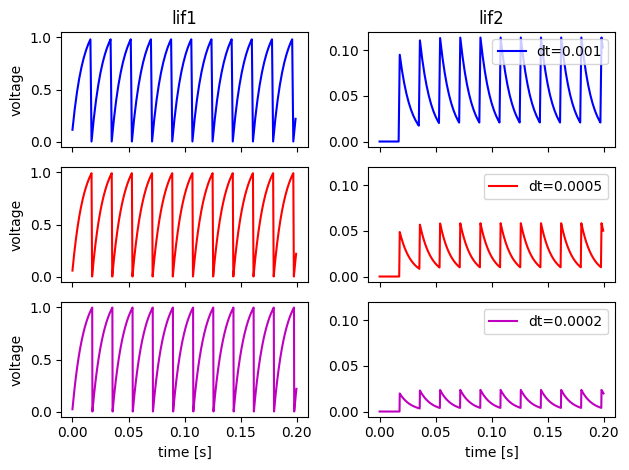

In [3]:
duration = 0.2 # seconds
dts = [0.001, 0.0005, 0.0002]
colors = ["b", "r", "m", "g"]

fig, axs = plt.subplots(len(dts), 2, sharex=True, sharey="col")

for i, dt in enumerate(dts):
    r = run_two_neuron_model_on_s2(nir_model, duration, dt)
    axs[i, 0].plot(r["times"], r["v1"], c=colors[i], label=f"dt={dt}")
    axs[i, 1].plot(r["times"], r["v2"], c=colors[i], label=f"dt={dt}")
    axs[i, 1].legend()
    axs[i, 0].set_ylabel("voltage")

    axs[-1, 0].set_xlabel("time [s]")
axs[-1, 1].set_xlabel("time [s]")
axs[0, 0].set_title("lif1")
axs[0, 1].set_title("lif2")

plt.tight_layout()
plt.show()